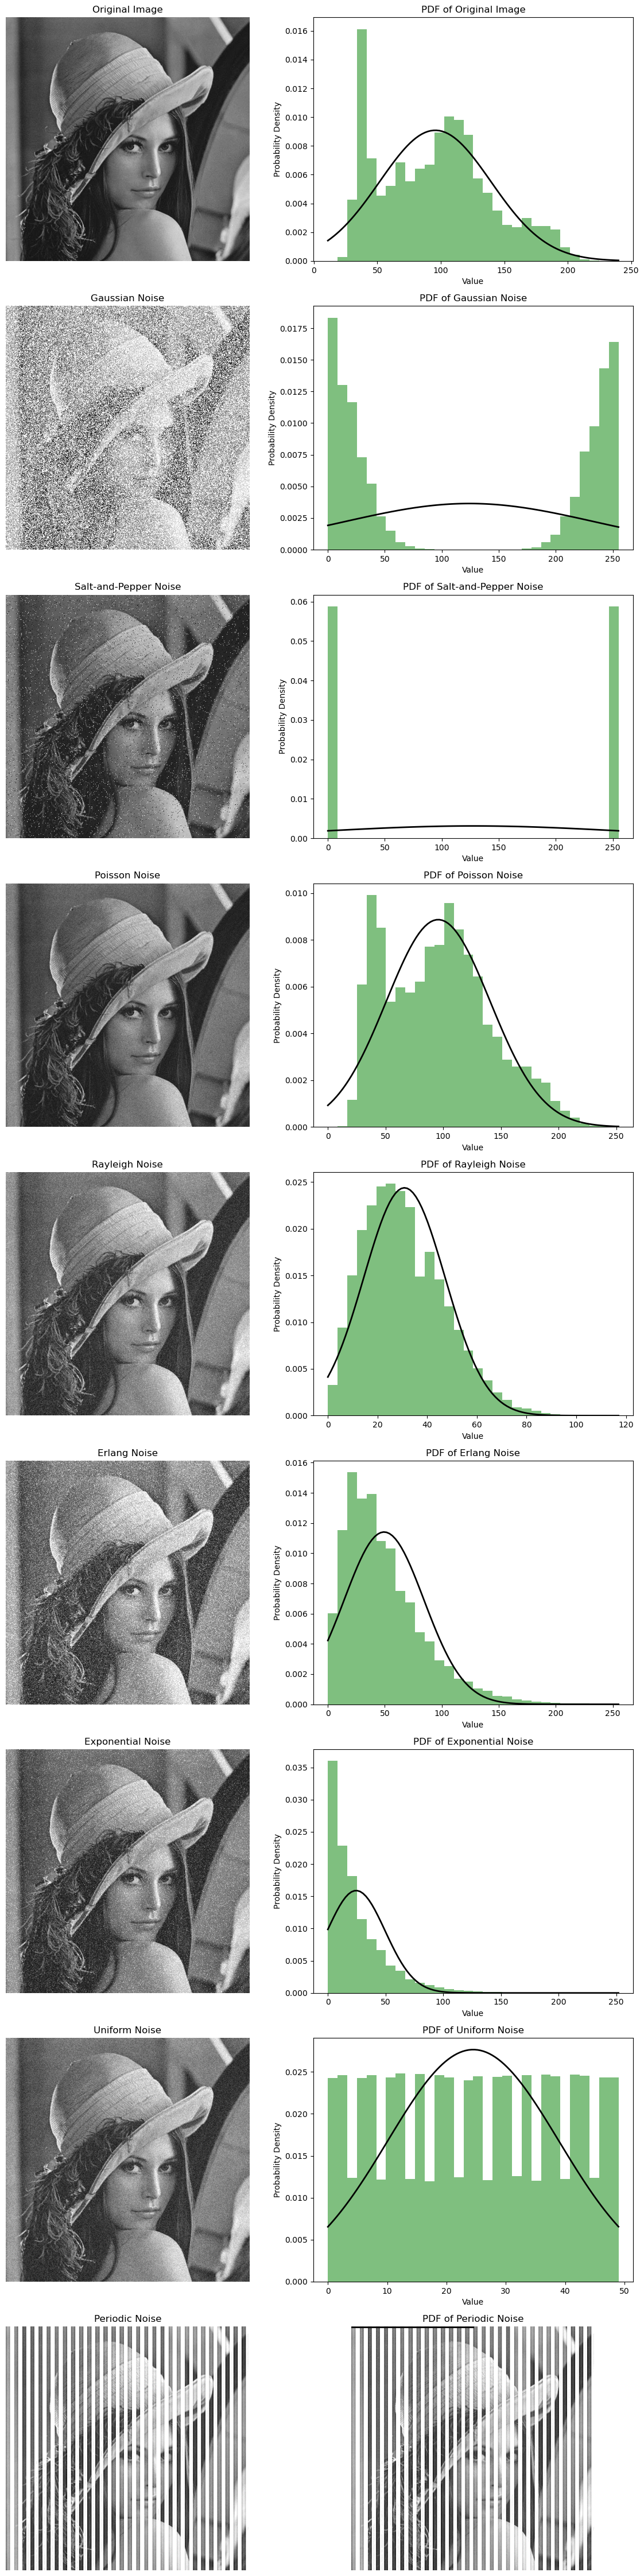

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

class NoiseAdder:
    def __init__(self, original_image):
        self.original_image = original_image

    def display_image(self, image, title):
        plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')

    def plot_pdf(self, data, title, ax):
        # Generate PDF
        mu, std = norm.fit(data)
        xmin, xmax = np.min(data), np.max(data)
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)

        ax.plot(x, p, 'k', linewidth=2)
        ax.hist(data, bins=30, density=True, alpha=0.5, color='g')
        ax.set_title(title)
        ax.set_xlabel('Value')
        ax.set_ylabel('Probability Density')

    def add_gaussian_noise(self, mean=0, sigma=25):
        gauss = np.random.normal(mean, sigma, self.original_image.shape).astype('uint8')
        noisy_image = cv2.add(self.original_image, gauss)
        return noisy_image, gauss.flatten()

    def add_salt_and_pepper_noise(self, salt_prob=0.02, pepper_prob=0.02):
        noisy_image = np.copy(self.original_image)
        total_pixels = self.original_image.size
        num_salt = np.ceil(salt_prob * total_pixels)
        num_pepper = np.ceil(pepper_prob * total_pixels)

        # Adding Salt noise
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in self.original_image.shape]
        noisy_image[coords[0], coords[1]] = 255  # White pixels (salt)

        # Adding Pepper noise
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in self.original_image.shape]
        noisy_image[coords[0], coords[1]] = 0  # Black pixels (pepper)

        return noisy_image, np.array([0, 255])

    def add_poisson_noise(self):
        noisy_image = np.random.poisson(self.original_image).astype('uint8')
        return noisy_image, noisy_image.flatten()

    def add_rayleigh_noise(self, scale=25):
        rayleigh_noise = np.random.rayleigh(scale, self.original_image.shape).astype(self.original_image.dtype)
        noisy_image = cv2.add(self.original_image, rayleigh_noise)
        return noisy_image, rayleigh_noise.flatten()

    def add_erlang_noise(self, shape=2, scale=25):
        gamma_noise = np.random.gamma(shape, scale, self.original_image.shape).astype(self.original_image.dtype)
        noisy_image = cv2.add(self.original_image, gamma_noise)
        return noisy_image, gamma_noise.flatten()

    def add_exponential_noise(self, scale=25):
        exp_noise = np.random.exponential(scale, self.original_image.shape).astype(self.original_image.dtype)
        noisy_image = cv2.add(self.original_image, exp_noise)
        return noisy_image, exp_noise.flatten()

    def add_uniform_noise(self, low=0, high=50):
        uniform_noise = np.random.uniform(low, high, self.original_image.shape).astype(self.original_image.dtype)
        noisy_image = cv2.add(self.original_image, uniform_noise)
        return noisy_image, uniform_noise.flatten()

    def add_periodic_noise(self, frequency=30, amplitude=50):
        if len(self.original_image.shape) == 2:  # Grayscale image
            rows, cols = self.original_image.shape
            x = np.arange(cols)
            periodic_noise = amplitude * np.sin(2 * np.pi * frequency * x / cols)
            periodic_noise = np.tile(periodic_noise, (rows, 1))  # Repeat the noise across all rows
        else:  # Color image (3 channels)
            rows, cols, channels = self.original_image.shape
            x = np.arange(cols)
            periodic_noise = amplitude * np.sin(2 * np.pi * frequency * x / cols)
            periodic_noise = np.tile(periodic_noise, (rows, 1))  # Repeat the noise across all rows
            periodic_noise = np.repeat(periodic_noise[:, :, np.newaxis], channels, axis=2)  # Repeat for each channel

        # Ensure the periodic noise is the same type as the original image
        periodic_noise = periodic_noise.astype(self.original_image.dtype)

        noisy_image = cv2.add(self.original_image, periodic_noise)
        return noisy_image, periodic_noise.flatten()


# # Load a sample image
# roses_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')
# original_image = cv2.imread(roses_path, cv2.IMREAD_GRAYSCALE)


# # Load images
lena_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')
original_image = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)




# Create an instance of NoiseAdder
noise_adder = NoiseAdder(original_image)

# Generate noises and corresponding data for PDF
# Correct `Original Image` entry to match the expected format
noises = {
    'Original Image': (original_image, original_image.flatten()),  # original_image.flatten() as placeholder data
    'Gaussian Noise': noise_adder.add_gaussian_noise(),
    'Salt-and-Pepper Noise': noise_adder.add_salt_and_pepper_noise(),
    'Poisson Noise': noise_adder.add_poisson_noise(),
    'Rayleigh Noise': noise_adder.add_rayleigh_noise(),
    'Erlang Noise': noise_adder.add_erlang_noise(),
    'Exponential Noise': noise_adder.add_exponential_noise(),
    'Uniform Noise': noise_adder.add_uniform_noise(),
    'Periodic Noise': noise_adder.add_periodic_noise(),
}


# Display each image with respective PDF
fig, axes = plt.subplots(len(noises), 2, figsize=(12, 5 * len(noises)))

for i, (title, (image, noise_data)) in enumerate(noises.items()):
    noise_adder.display_image(image, title)
    axes[i, 0].imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    axes[i, 0].set_title(title)
    axes[i, 0].axis('off')
    
    noise_adder.plot_pdf(noise_data, f'PDF of {title}', axes[i, 1])

plt.tight_layout()
plt.show()
